# Diabetes Exploratory Data Analysis (EDA) and Prediction

**Overview**: This capstone project is centered around analyzing medical data related to diabetes and creating predictive models to forecast a person's diabetes status. The project includes exploratory data analysis (EDA), hypothesis testing, observations, and the development of various models to accurately predict the presence or absence of diabetes.  



### Content and dataset

The Behavioral Risk Factor Surveillance System (BRFSS) is a health-related telephone survey that is collected annually by the CDC. Each year, the survey collects responses from over 400,000 Americans on health-related risk behaviors, chronic health conditions, and the use of preventative services. It has been conducted every year since 1984. For this project, a cleaned csv of the dataset available on Kaggle for the year 2015 was used [link](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset). 
This original dataset contains responses from 441,455 individuals and has 330 features. These features are either questions directly asked of participants, or calculated variables based on individual participant responses. The original data set is available on CDC page [link](https://www.cdc.gov/brfss/annual_data/annual_2015.html)


This dataset, diabetes _ 012 _ health _ indicators _ BRFSS2015.csv is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_012 has 3 classes. 0 is for no diabetes or only during pregnancy, 1 is for prediabetes, and 2 is for diabetes. There is class imbalance in this dataset. This dataset has 21 feature variables


### 1. Understanding the Data - Exploratory Data Analysis (EDA)


### Import Libraries and Read in the Data

Use pandas to read in the dataset `diabetes_012_health_indicators_BRFSS2015.csv` and assign to a meaningful variable name.

In [1]:
#!pip3 install xgboost 
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns
#from scipy.stats import zscore
import plotly.graph_objs as go # visualization
import plotly.offline as py # visualization
from plotly.subplots import make_subplots
import plotly.figure_factory as ff # visualization

from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from imblearn.combine import SMOTEENN

from sklearn import metrics
import time

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn import set_config
set_config(display="diagram")

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline


C:\Users\sathi\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning:

Blowfish has been deprecated



In [2]:
# Load the dataset
df_raw = pd.read_csv('data/diabetes_012_health_indicators_BRFSS2015.csv')
df_raw.head(5)


Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0   
2          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0   
3          0.0      2.0       0.0       0.0       0.0  0.0  11.0        3.0   
4          0.0      2.0       3.0       0.0       0.0  0.0  11.0        5.0   

   Income  
0     3.0  
1     1.0  
2     8.0  
3     6.0  
4     4.0  

[5 rows x 22 columns]

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
# Data over view of the diabetes dataset

def dataoveriew(df, message, disp_val):
    print(f'{message}:\n')
    print("Rows:", df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nFeatures:")
    print(df.columns.tolist())
    print("\nMissing values:", df.isnull().sum().values.sum())
    print("\nUnique values:")
    print(df.nunique())
    
    # for each column
    if disp_val == "y":
        for a in list(df.columns):
            # get a list of unique values
            n = df[a].unique()
            # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
            if len(n)<30:
                print(a)
                print(n)
            else:
                print(a + ': ' +str(len(n)) + ' unique values')

In [5]:
dataoveriew(df_raw, 'Overiew of the raw full dataset','y')


Overiew of the raw full dataset:

Rows: 253680

Number of features: 22

Features:
['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

Missing values: 0

Unique values:
Diabetes_012             3
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

### Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.

```
Input variables:
# Diabetes data:

**Diabetes_012** : you have diabetes (0,1,2) - target feature

0 = Not diabetic
1 = Pre diabetic
2 = diabetic


**HighBP** : Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional (0,1)
**HighChol** : Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high? (0,1)
**CholCheck** : Cholesterol check within past five years (0,1)
**BMI** : Body Mass Index (BMI)
**Smoker** : Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] (0,1)
**Stroke** : (Ever told) you had a stroke. (0,1)
**HeartDiseaseorAttack** : Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) (0,1)
**PhysActivity** : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job (0,1)
**Fruits** : Consume Fruit 1 or more times per day (0,1)
**Veggies** : Consume Vegetables 1 or more times per day (0,1)
**HvyAlcoholConsump** : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)(0,1)
**AnyHealthcare** : Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? (0,1)
**NoDocbcCost** : Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? (0,1)
**GenHlth** : Would you say that in general your health is: rate (1 ~ 5)
**MentHlth** : Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (0 ~ 30)
**PhysHlth** : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0 ~ 30)
**DiffWalk** : Do you have serious difficulty walking or climbing stairs? (0,1)
**Sex** : Indicate sex of respondent (0,1) (Female or Male)
**Age** : Fourteen-level age category (1 ~ 14)
**Education** : What is the highest grade or year of school you completed? (1 ~ 6)
**Income** : Is your annual household income from all sources: (If respondent refuses at any income level, code "Refused.") (1 ~ 8)
```

#### Examin and clean data - check missed or and duplicate data

##### There is no missing value in this dataset. dropping duplicate data



In [98]:
# Remove duplicate records

#Checking for duplicated rows
print("Duplicate rows:", df_raw.duplicated().sum())

df_raw.drop_duplicates(inplace=True)

#overview of the data

dataoveriew(df_raw, 'Overiew of the raw dataset after removal of duplicate records','n')

Duplicate rows: 0
Overiew of the raw dataset after removal of duplicate records:

Rows: 229781

Number of features: 22

Features:
['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

Missing values: 0

Unique values:
Diabetes_012             3
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education         

In [7]:
# Data Exploration and verify if data is balanced

trace = go.Pie(labels = df_raw["Diabetes_012"].value_counts().keys().tolist(),
               values = df_raw["Diabetes_012"].value_counts().values.tolist(),
               marker = dict(colors = ['royalblue','lime'],
                             line = dict(color = "white", width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Diabetes and Prediabetes %",
                        plot_bgcolor = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )
data = [trace]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

#### This dataset has imbalanced with only 17.3% population has diabetes (15.3%) or prediabetes (2. 01%) condition and rest of the 82.7% population is with no diabetes condition.



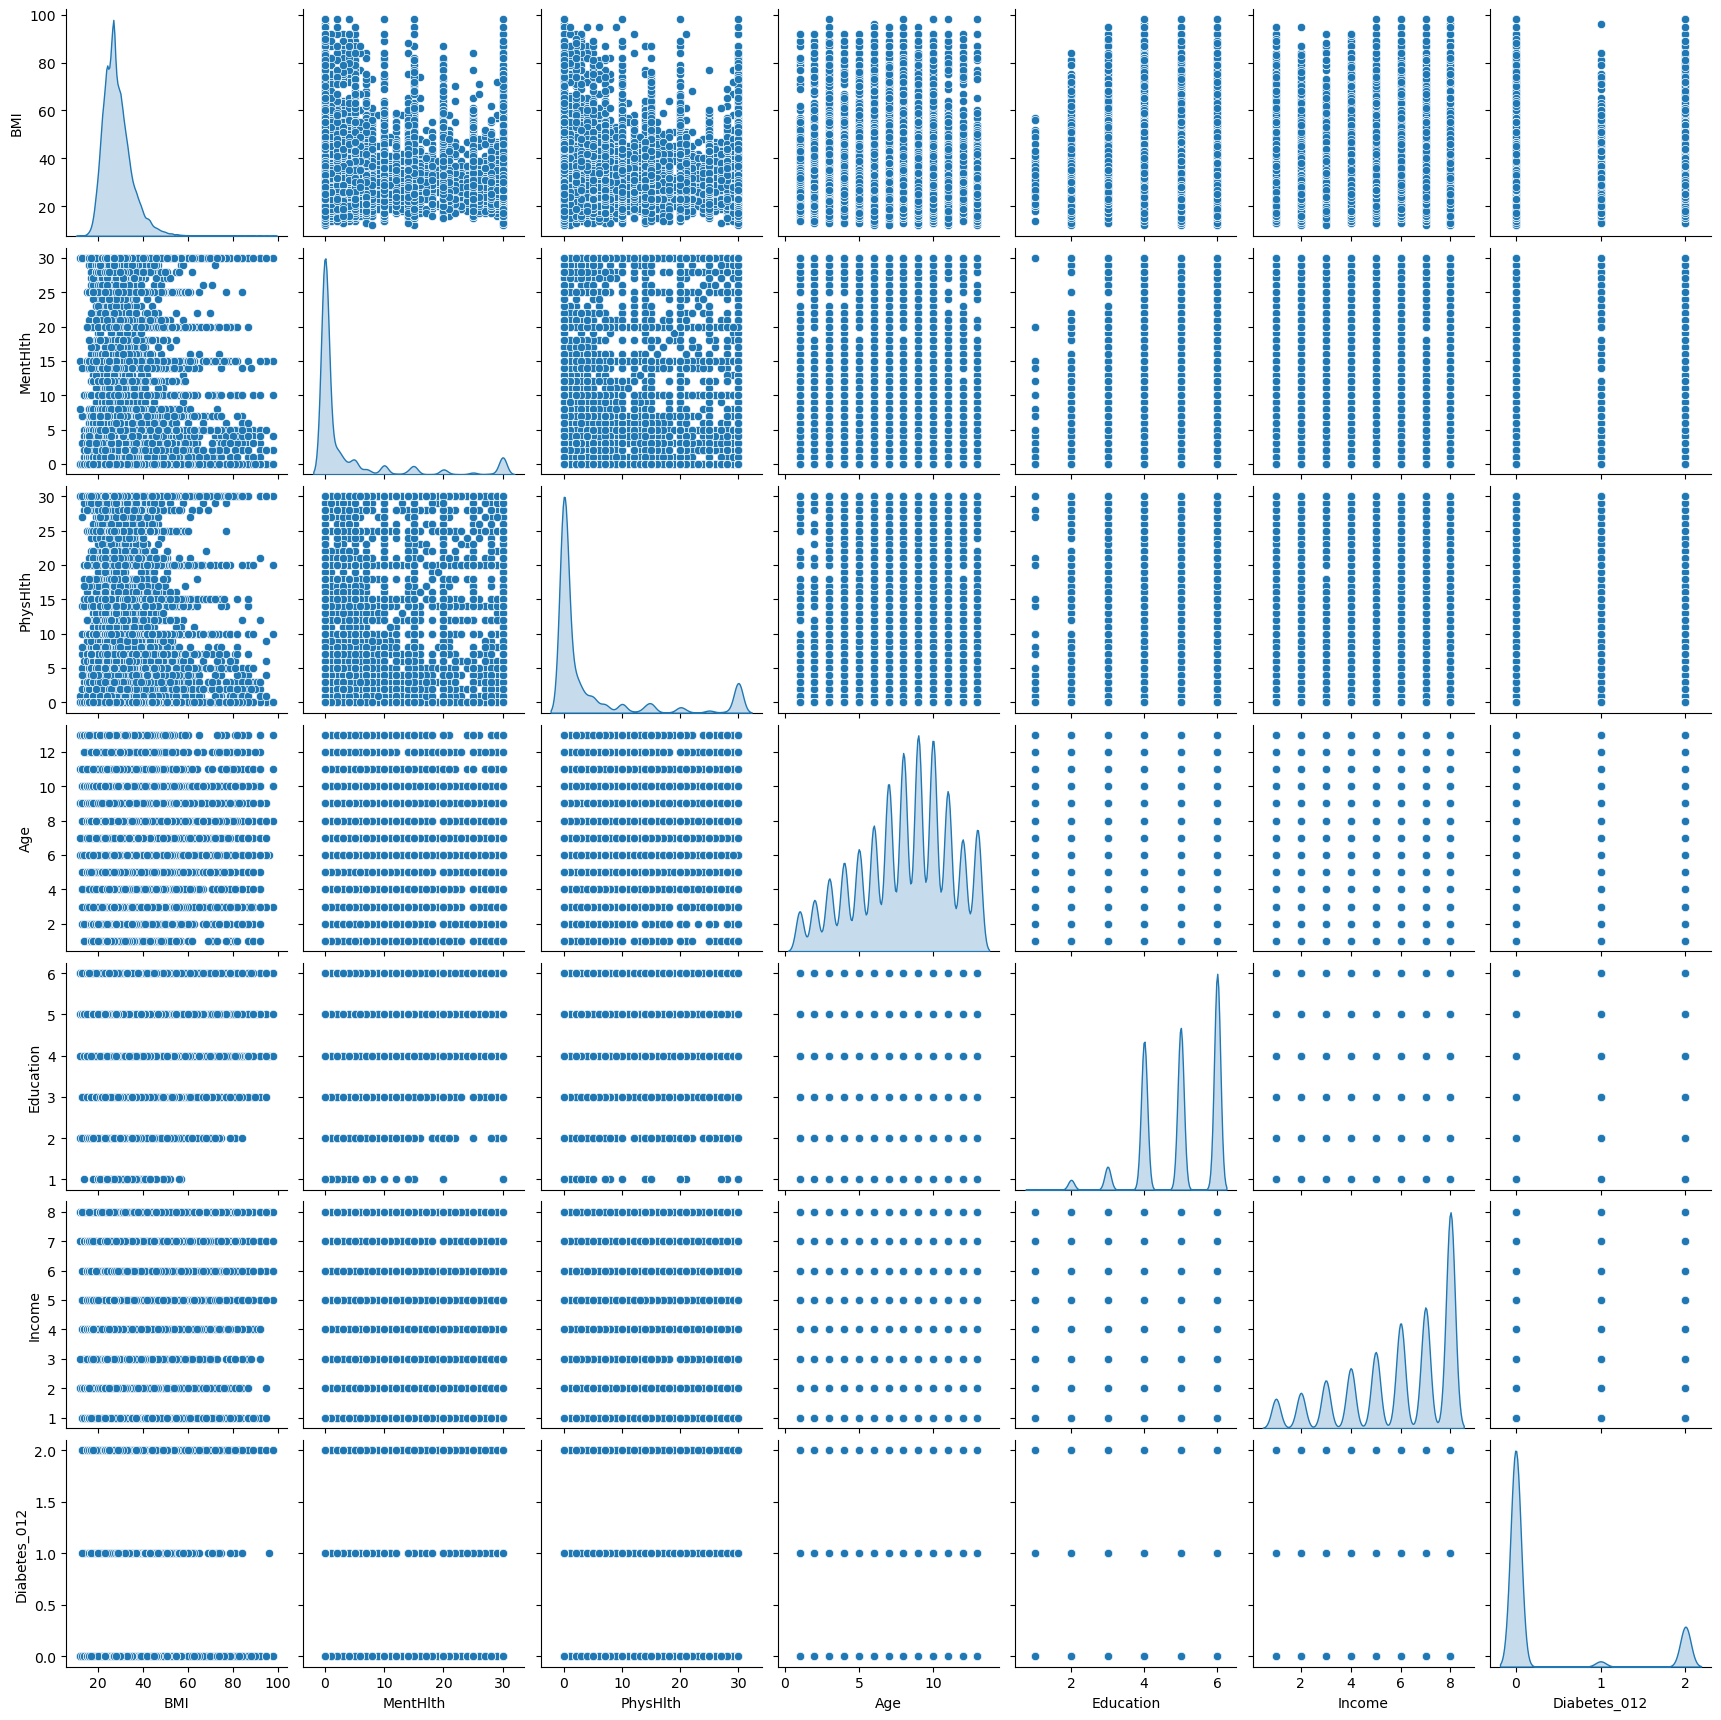

In [8]:
#Analyse data

#Separating columns to be visualized
out_cols = list(set(df_raw.nunique()[df_raw.nunique()<6].keys().tolist()
                    + df_raw.select_dtypes(include='object').columns.tolist()))
viz_cols = [x for x in df_raw.columns if x not in out_cols] + ['Diabetes_012']
#sns.set_palette('summer_r')
sns.pairplot(df_raw[viz_cols], diag_kind="kde")
plt.show()

In [9]:
#Describe the numeric columns 

df_raw.describe().T

count       mean       std   min   25%   50%   75%  \
Diabetes_012          229781.0   0.325627  0.724623   0.0   0.0   0.0   0.0   
HighBP                229781.0   0.454441  0.497921   0.0   0.0   0.0   1.0   
HighChol              229781.0   0.441760  0.496598   0.0   0.0   0.0   1.0   
CholCheck             229781.0   0.959535  0.197047   0.0   1.0   1.0   1.0   
BMI                   229781.0  28.685670  6.786360  12.0  24.0  27.0  32.0   
Smoker                229781.0   0.465661  0.498821   0.0   0.0   0.0   1.0   
Stroke                229781.0   0.044756  0.206767   0.0   0.0   0.0   0.0   
HeartDiseaseorAttack  229781.0   0.103216  0.304241   0.0   0.0   0.0   0.0   
PhysActivity          229781.0   0.733355  0.442206   0.0   0.0   1.0   1.0   
Fruits                229781.0   0.612966  0.487073   0.0   0.0   1.0   1.0   
Veggies               229781.0   0.794813  0.403839   0.0   1.0   1.0   1.0   
HvyAlcoholConsump     229781.0   0.060710  0.238798   0.0   0.0   0.0   0.0   
AnyHealthcare         229781.0   0.946075  0.225871   0.0   1.0   1.0   1.0   
NoDocbcCost           229781.0   0.092810  0.290167   0.0   0.0   0.0   0.0   
GenHlth               229781.0   2.601151  1.064685   1.0   2.0   3.0   3.0   
MentHlth              229781.0   3.505373  7.713725   0.0   0.0   0.0   2.0   
PhysHlth              229781.0   4.675178  9.046568   0.0   0.0   0.0   4.0   
DiffWalk              229781.0   0.185507  0.388709   0.0   0.0   0.0   0.0   
Sex                   229781.0   0.439231  0.496295   0.0   0.0   0.0   1.0   
Age                   229781.0   8.086582  3.093809   1.0   6.0   8.0  10.0   
Education             229781.0   4.980568  0.992895   1.0   4.0   5.0   6.0   
Income                229781.0   5.890383  2.092477   1.0   5.0   6.0   8.0   

                       max  
Diabetes_012           2.0  
HighBP                 1.0  
HighChol               1.0  
CholCheck              1.0  
BMI                   98.0  
Smoker                 1.0  
Stroke                 1.0  
HeartDiseaseorAttack   1.0  
PhysActivity           1.0  
Fruits                 1.0  
Veggies                1.0  
HvyAlcoholConsump      1.0  
AnyHealthcare          1.0  
NoDocbcCost            1.0  
GenHlth                5.0  
MentHlth              30.0  
PhysHlth              30.0  
DiffWalk               1.0  
Sex                    1.0  
Age                   13.0  
Education              6.0  
Income                 8.0

Text(0.5, 1.0, 'High Blood Pressure(BP) correlation to the Diabetes')

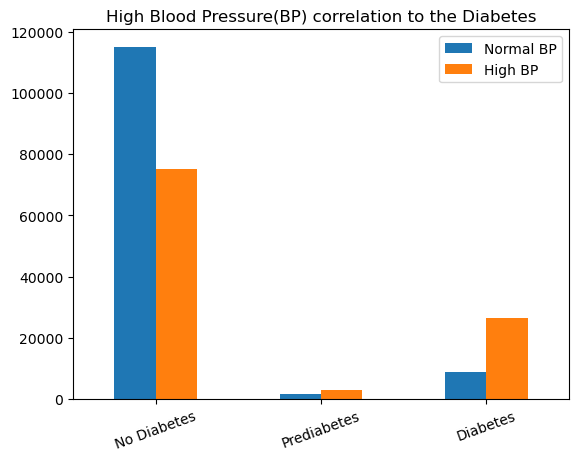

In [10]:
# visualize HighBP correlation to the diabetes
#sns.countplot(x='Diabetes_012', hue='HighBP', data=df_raw)
hbp= pd.crosstab(df_raw.Diabetes_012, df_raw.HighBP)
ax = hbp.plot(kind='bar')
ax.set(xlabel=None)
ax.set_xticklabels(['No Diabetes', 'Prediabetes','Diabetes'], rotation=20)
ax.legend(['Normal BP', 'High BP'])
plt.title('High Blood Pressure(BP) correlation to the Diabetes')

(15.0, 60.0)

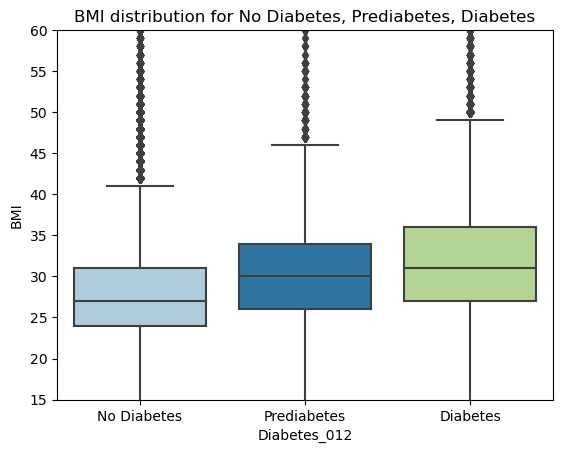

In [11]:
# visualize BMI correlation to the diabetes
ax = sns.boxplot(data=df_raw, x='Diabetes_012', y='BMI', palette='Paired')
ax.set(title = 'BMI distribution for No Diabetes, Prediabetes, Diabetes')
ax.set_xticklabels(['No Diabetes', 'Prediabetes', 'Diabetes'])
plt.ylim(15, 60)

Text(0.5, 1.0, 'High Cholestrol correlation to the Diabetes')

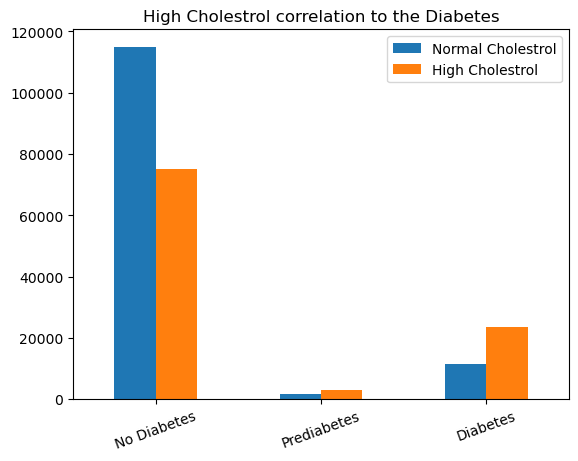

In [12]:
# visualize High Cholestrol correlation to the diabetes
#sns.countplot(x='Diabetes_012', hue='HighChol', data=df_raw)
hchl= pd.crosstab(df_raw.Diabetes_012, df_raw.HighChol)
ax = hchl.plot(kind='bar')
ax.set(xlabel=None)
ax.set_xticklabels(['No Diabetes', 'Prediabetes','Diabetes'], rotation=20)
ax.legend(['Normal Cholestrol', 'High Cholestrol'])
plt.title('High Cholestrol correlation to the Diabetes')

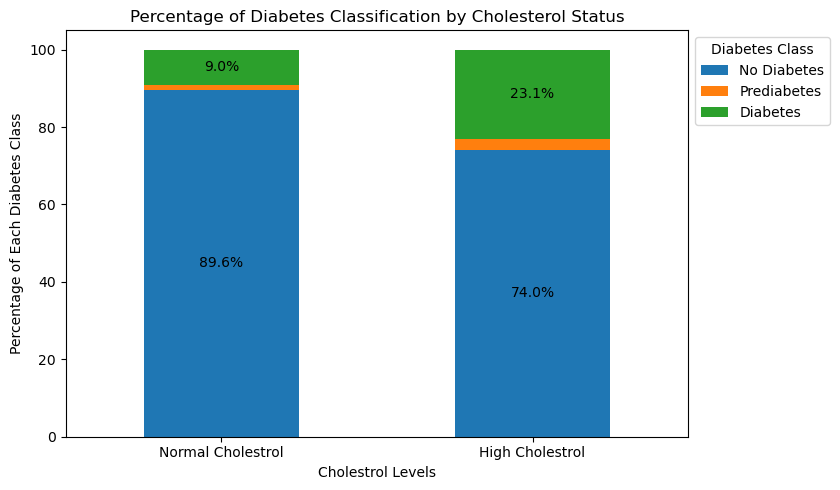

In [13]:
# Plot Percentage of Diabetes Classification by Cholesterol

diabetes_percentages = df_raw.groupby(['HighChol', 'Diabetes_012']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack()
# Create a bar plot
ax = diabetes_percentages.plot(kind='bar', stacked=True, figsize=(10, 5))

# Adding the percentage text on the bars
for c in ax.containers:
    # Optional: if the segment is too small, don't place a label
    labels = [f'{w:.1f}%' if (w := v.get_height()) > 5 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')

# Adding titles and labels
plt.title('Percentage of Diabetes Classification by Cholesterol Status')
plt.xlabel('Cholestrol Levels')
plt.ylabel('Percentage of Each Diabetes Class')
plt.xticks(ticks=[0, 1], labels=['Normal Cholestrol', 'High Cholestrol'], rotation=0)

# Move the legend to the right top and outside of the plot area
plt.legend(title='Diabetes Class', labels=['No Diabetes', 'Prediabetes', 'Diabetes'], loc='upper left', bbox_to_anchor=(1,1))

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust the rect to make space for the legend

# Show plot with the adjusted legend
plt.show()

In [14]:
df_raw.cov()

Diabetes_012    HighBP  HighChol  CholCheck        BMI  \
Diabetes_012              0.525079  0.094522  0.073167   0.010809   1.042654   
HighBP                    0.094522  0.247925  0.070270   0.010912   0.655966   
HighChol                  0.073167  0.070270  0.246609   0.009272   0.302011   
CholCheck                 0.010809  0.010912  0.009272   0.038827   0.056725   
BMI                       1.042654  0.655966  0.302011   0.056725  46.054687   
Smoker                    0.016907  0.018438  0.018486  -0.000371  -0.031129   
Stroke                    0.015024  0.012810  0.009165   0.001136   0.015522   
HeartDiseaseorAttack      0.037658  0.030490  0.026633   0.002997   0.082435   
PhysActivity             -0.033135 -0.022928 -0.013893  -0.000384  -0.383715   
Fruits                   -0.008987 -0.004688 -0.006319   0.001725  -0.223210   
Veggies                  -0.012714 -0.008617 -0.005466  -0.000043  -0.121094   
HvyAlcoholConsump        -0.011622 -0.001691 -0.002265  -0.000990  -0.094534   
AnyHealthcare             0.004077  0.005858  0.005879   0.005142  -0.013121   
NoDocbcCost               0.004955  0.000320  0.000418  -0.003099   0.090262   
GenHlth                   0.219785  0.144493  0.099362   0.013171   1.505837   
MentHlth                  0.322506  0.143546  0.192343  -0.002355   3.593853   
PhysHlth                  1.052033  0.650503  0.497772   0.072394   6.313922   
DiffWalk                  0.059330  0.040935  0.026219   0.003751   0.481694   
Sex                       0.011595  0.011653  0.005642  -0.002372   0.104371   
Age                       0.413938  0.523465  0.405397   0.058521  -1.036084   
Education                -0.077518 -0.055705 -0.024574  -0.001909  -0.502448   
Income                   -0.223044 -0.145637 -0.064292   0.000891  -0.982550   

                        Smoker    Stroke  HeartDiseaseorAttack  PhysActivity  \
Diabetes_012          0.016907  0.015024              0.037658     -0.033135   
HighBP                0.018438  0.012810              0.030490     -0.022928   
HighChol              0.018486  0.009165              0.026633     -0.013893   
CholCheck            -0.000371  0.001136              0.002997     -0.000384   
BMI                  -0.031129  0.015522              0.082435     -0.383715   
Smoker                0.248822  0.005615              0.015958     -0.014775   
Stroke                0.005615  0.042753              0.012510     -0.005435   
HeartDiseaseorAttack  0.015958  0.012510              0.092563     -0.009857   
PhysActivity         -0.014775 -0.005435             -0.009857      0.195546   
Fruits               -0.015051 -0.000465             -0.001056      0.026984   
Veggies              -0.002798 -0.002767             -0.003358      0.024194   
HvyAlcoholConsump     0.011442 -0.001050             -0.002576      0.002449   
AnyHealthcare        -0.001575  0.000634              0.001780      0.002407   
NoDocbcCost           0.005407  0.001721              0.001949     -0.005982   
GenHlth               0.071685  0.037396              0.079818     -0.111901   
MentHlth              0.299030  0.099063              0.123810     -0.362167   
PhysHlth              0.453582  0.263593              0.469200     -0.798337   
DiffWalk              0.020975  0.013618              0.023981     -0.040556   
Sex                   0.023941  0.000365              0.013547      0.007371   
Age                   0.166136  0.081907              0.210491     -0.119763   
Education            -0.067255 -0.013205             -0.024911      0.075178   
Income               -0.099595 -0.050721             -0.078245      0.153759   

                        Fruits  ...  AnyHealthcare  NoDocbcCost   GenHlth  \
Diabetes_012         -0.008987  ...       0.004077     0.004955  0.219785   
HighBP               -0.004688  ...       0.005858     0.000320  0.144493   
HighChol             -0.006319  ...       0.005879     0.000418  0.099362   
CholCheck             0.001725  

In [15]:
# List of binary, ordinal & numerical features
target = ['Diabetes_012']
features_binary = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
                   'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
features_ordinal = ['GenHlth', 'Age', 'Education', 'Income']
features_numerical = ['BMI', 'MentHlth', 'PhysHlth']

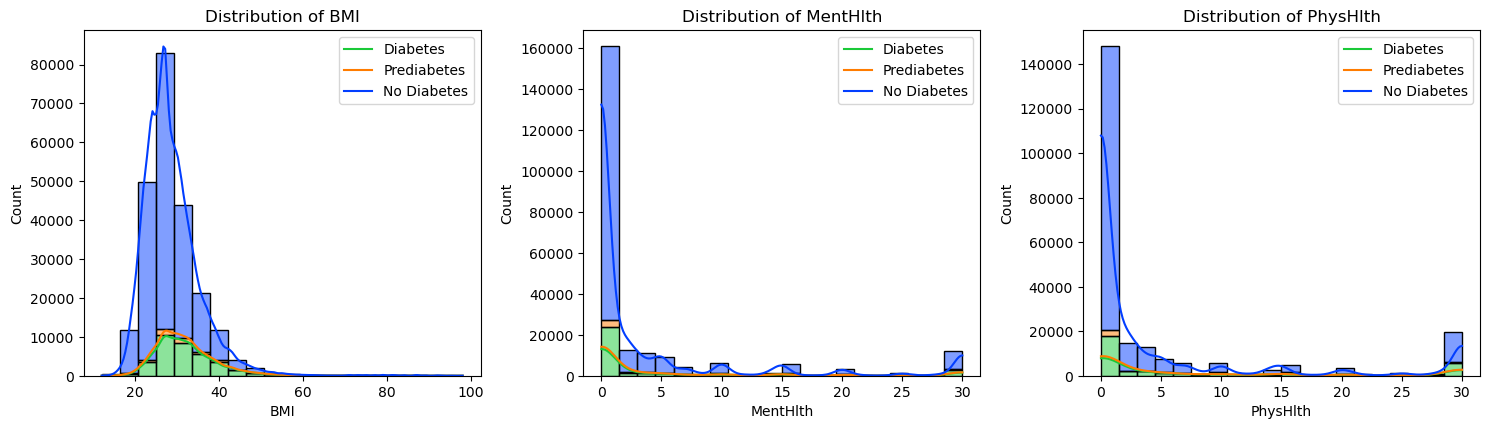

In [16]:
# Visualize numerical features via histplots

plt.figure(figsize=(15, 8))

for i, feature in enumerate(features_numerical, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_raw, x=feature, kde=True, bins=20, hue='Diabetes_012', multiple='stack', palette='bright')
    plt.title(f'Distribution of {feature}')
    plt.legend(['Diabetes', 'Prediabetes','No Diabetes'])
 

plt.tight_layout()
plt.show()

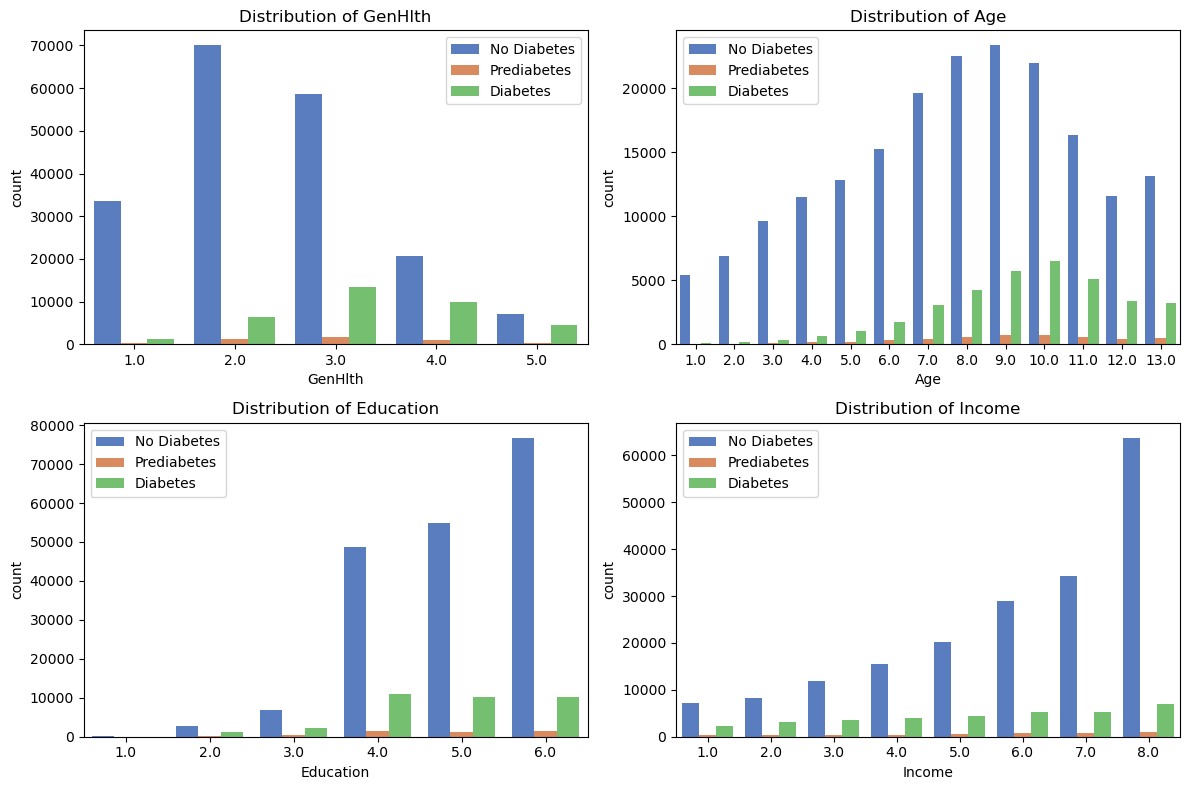

In [17]:
# Visualize ordinal features via countplots
# Set up subplots for plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
fig.subplots_adjust(hspace=0.5)

# Loop through ordinal features and create plots
for i, feature in enumerate(features_ordinal):
    row, col = i // 2, i % 2
    sns.countplot(x=feature, hue='Diabetes_012', data=df_raw, ax=axes[row, col], palette='muted')
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].legend(['No Diabetes', 'Prediabetes','Diabetes'])

plt.tight_layout()
plt.show()

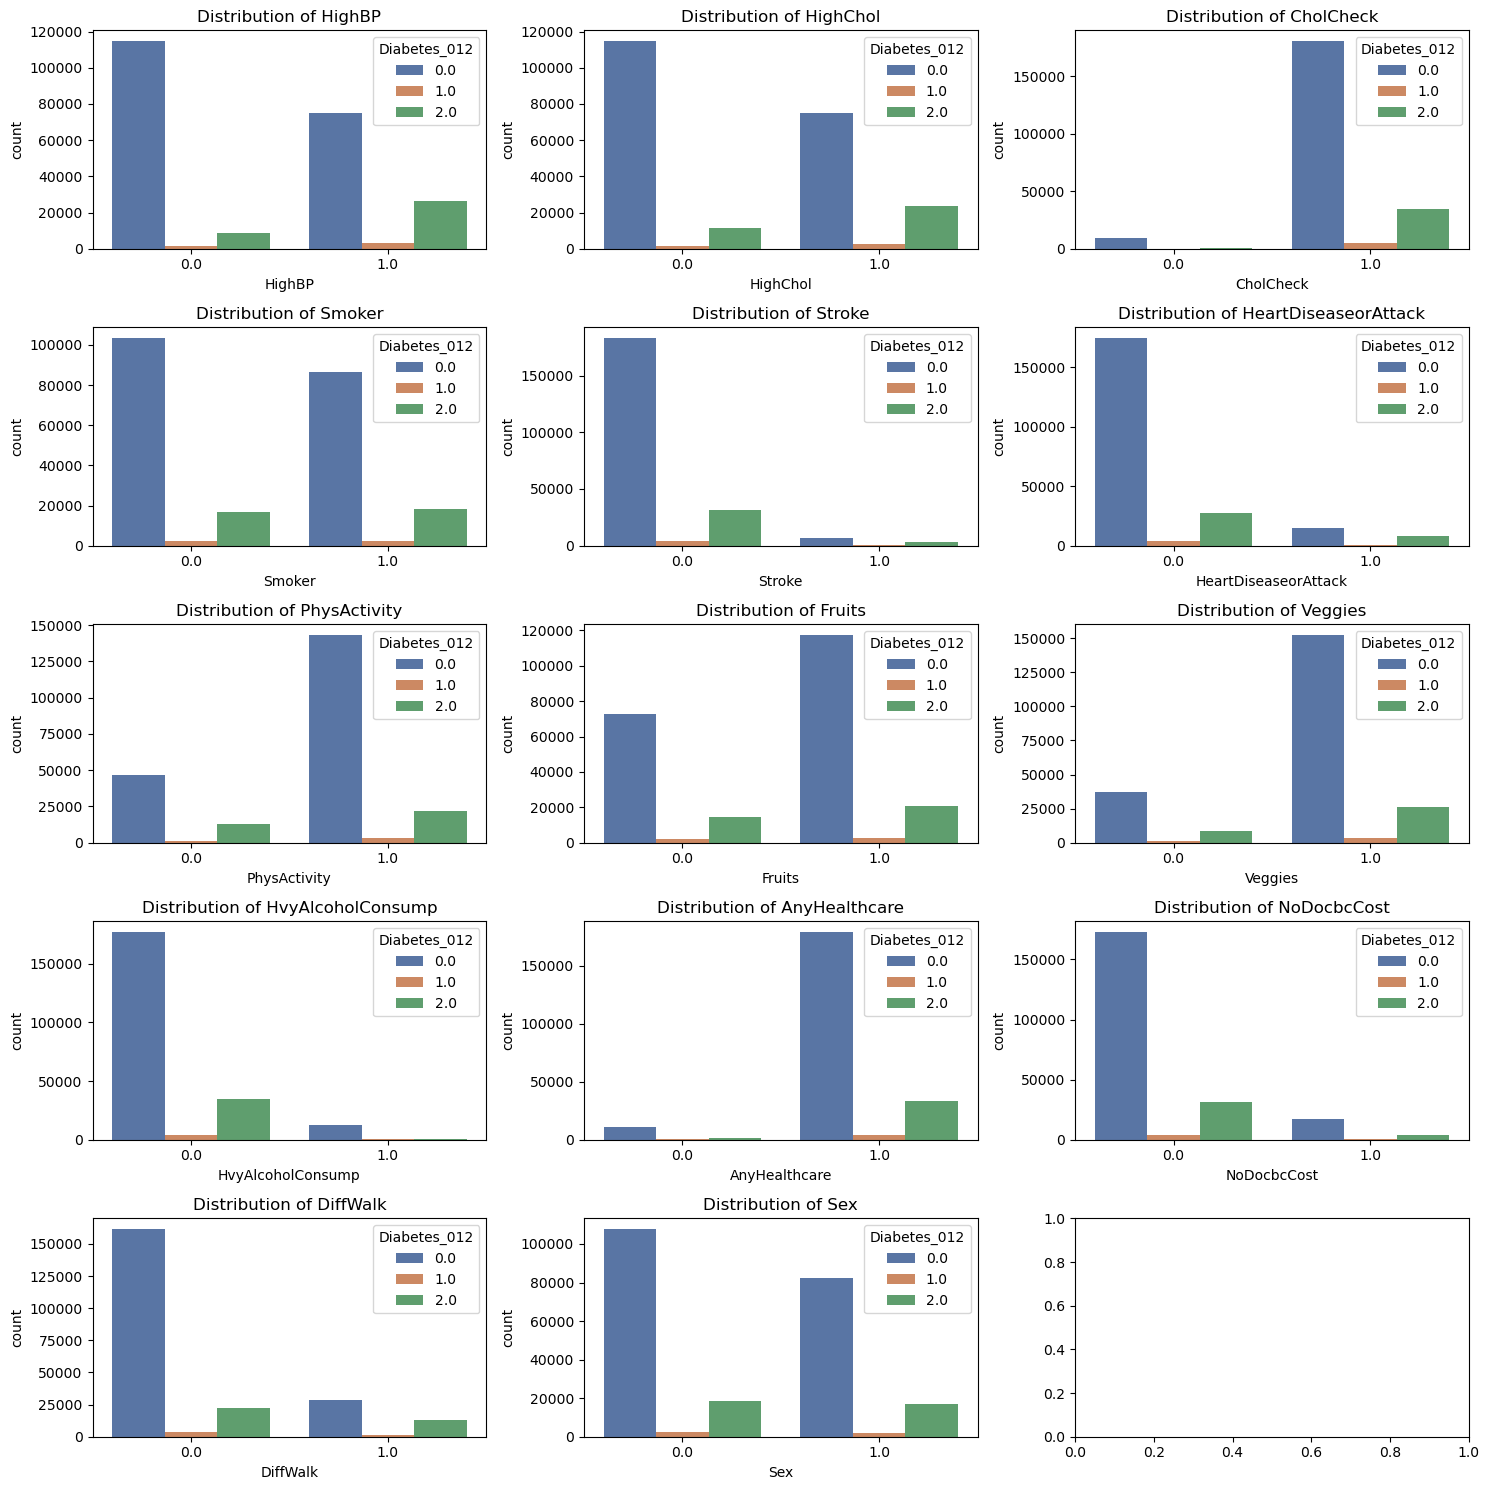

In [18]:
# Loop through binary features and create plots

# Set up subplots for plotting
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

for i, feature in enumerate(features_binary):
    row, col = i // 3, i % 3
    sns.countplot(x=feature, hue='Diabetes_012', data=df_raw, ax=axes[row, col], palette='deep')
    axes[row, col].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

Correlation Matrix 



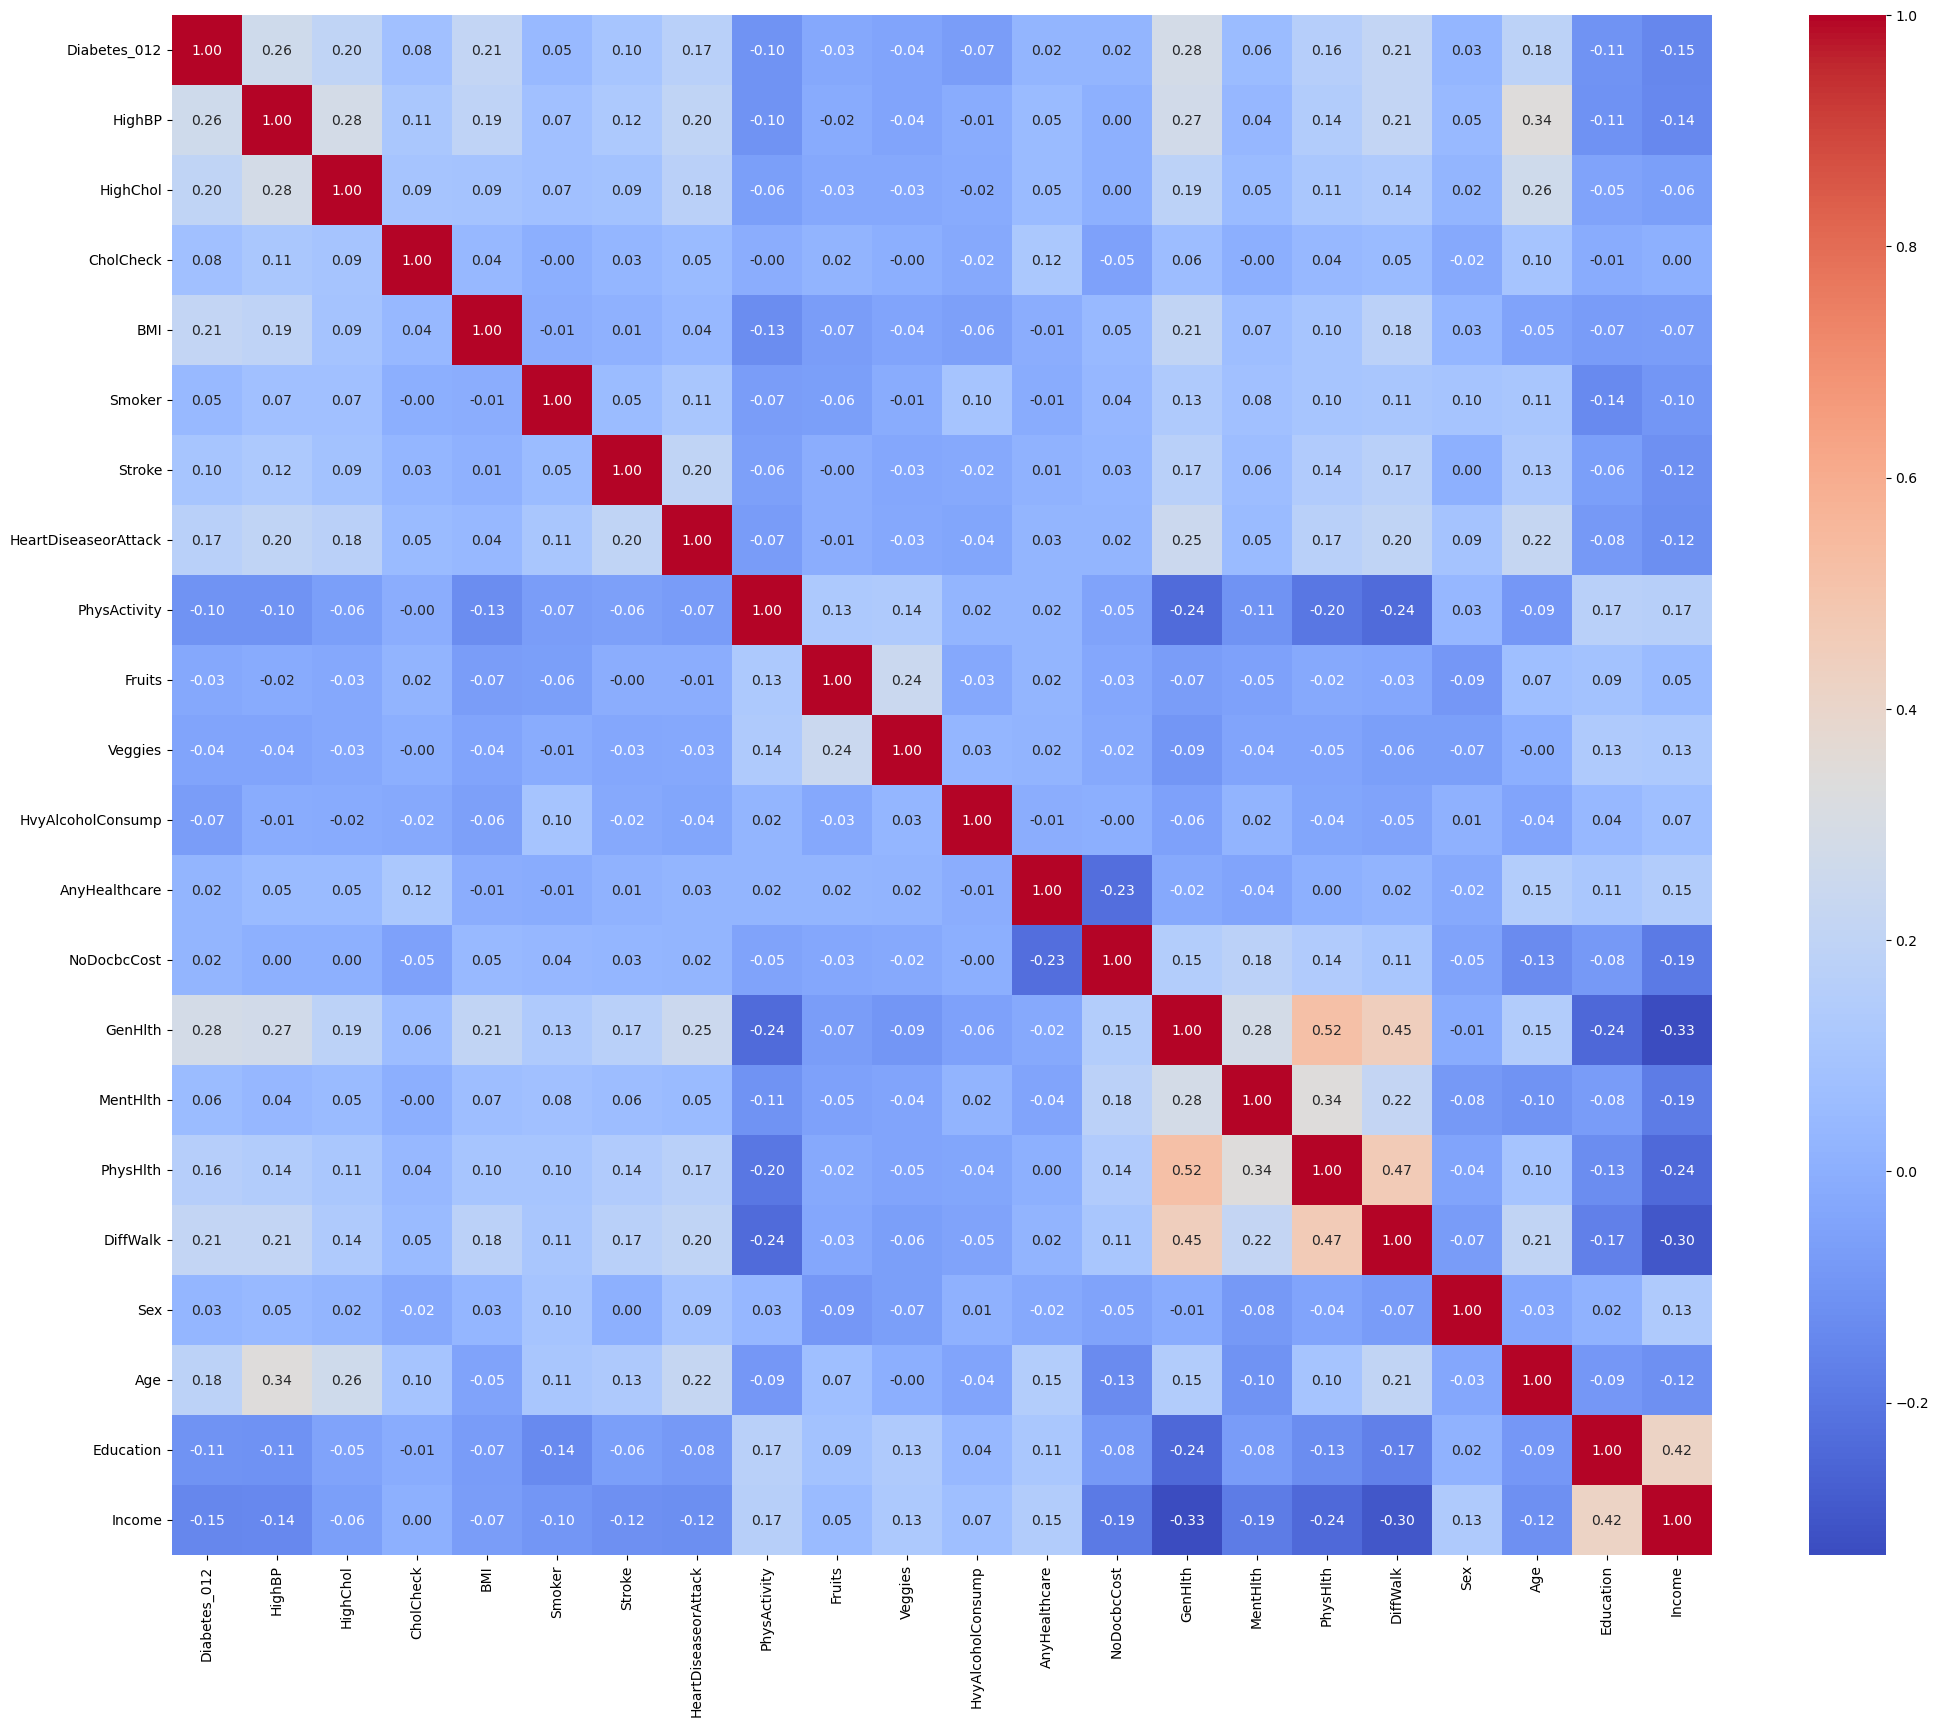

In [19]:
#Correlation - Heat map

print("Correlation Matrix","\n")    
correlation=df_raw.corr(method="pearson")
plt.figure(figsize=(25,20))
sns.heatmap(correlation,vmax=1,square=True,annot=True,fmt=".2f", cmap='coolwarm')
plt.show()

In [20]:
df_raw.corr()['Diabetes_012'].sort_values()

Income                 -0.147102
Education              -0.107742
PhysActivity           -0.103408
HvyAlcoholConsump      -0.067164
Veggies                -0.043446
Fruits                 -0.025462
NoDocbcCost             0.023568
AnyHealthcare           0.024911
Sex                     0.032243
Smoker                  0.046774
MentHlth                0.057698
CholCheck               0.075701
Stroke                  0.100276
PhysHlth                0.160485
HeartDiseaseorAttack    0.170816
Age                     0.184642
HighChol                0.203327
DiffWalk                0.210638
BMI                     0.212027
HighBP                  0.261976
GenHlth                 0.284881
Diabetes_012            1.000000
Name: Diabetes_012, dtype: float64

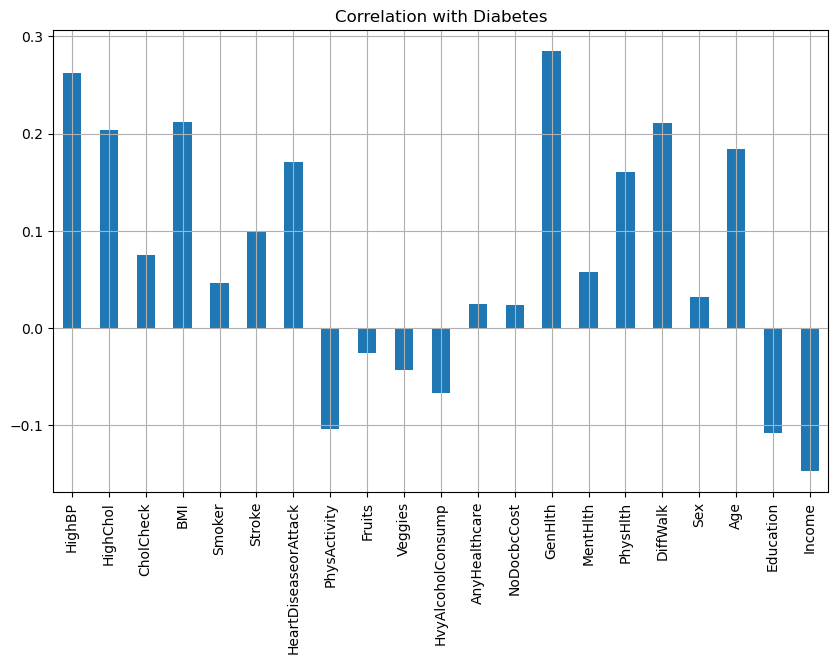

In [21]:
#Correlation plot with Diabetes
df_raw.drop('Diabetes_012', axis=1).corrwith(df_raw.Diabetes_012).plot(kind='bar', grid=True, figsize=(10, 6), title="Correlation with Diabetes")
plt.show();

#### **Observations from the above pairplot and correlations** 

1. Most of the diabetes people have high Blood Pressure (HighBP), high cholestrol (HighChol) and high BMI.
2. Both men and women are vulnerable to diabetes
3. Age groups most affected: 60-64, 65-70, 70-74.
4. Smoking and alcohol consumption have little effect on diabetes. 
5. Most of the diabetes people have less physical activity and difficulty walking.

##### **Additional Insights from the above correlation matrix** 

1. Poor general health is linked to both difficulty in walking and poorer physical health. 
2. Mental health is also affected similarly. 
3. Higher income levels might lead to better general health. 
4. BMI is positively correlated with Diabetes
5. HighChol and HighBP also have a positive correlation with Diabetes.



### Understanding the Task

After examining the description and data, the task is predicting diabetes and improving understanding of the relationship between lifestyle and diabetes in the US

In [255]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229781 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          229781 non-null  float64
 1   HighBP                229781 non-null  float64
 2   HighChol              229781 non-null  float64
 3   CholCheck             229781 non-null  float64
 4   BMI                   229781 non-null  float64
 5   Smoker                229781 non-null  float64
 6   Stroke                229781 non-null  float64
 7   HeartDiseaseorAttack  229781 non-null  float64
 8   PhysActivity          229781 non-null  float64
 9   Fruits                229781 non-null  float64
 10  Veggies               229781 non-null  float64
 11  HvyAlcoholConsump     229781 non-null  float64
 12  AnyHealthcare         229781 non-null  float64
 13  NoDocbcCost           229781 non-null  float64
 14  GenHlth               229781 non-null  float64
 15  

### 2. Preparation for Predictive Modelling 

#### Preprocess data

1. Balance dataset
2. Transform data
3. Standardize data

#### Train and Test data split
Given the size of the dataset, spliting the data by 75:25 ratio


In [256]:
# Drop non-significant features - Feature engineering
df_raw = df_raw.drop(['NoDocbcCost', 'AnyHealthcare', 'Sex', 'Fruits'], axis=1)

In [257]:
df_features = df_raw.drop("Diabetes_012",axis=1)
df_target = df_raw["Diabetes_012"]

In [258]:
df_target.value_counts()

0.0    190055
2.0     35097
1.0      4629
Name: Diabetes_012, dtype: int64

In [259]:
#Balance dataset
def calc_prevalence(y_actual):
    # this function calculates the prevalence of the positive class (label = 1)
    return (sum(y_actual)/len(y_actual))

In [30]:
# split the training data into positive and negative
rows_pos1 = df_raw.Diabetes_012 == 1 #Prediatetes
rows_pos = df_raw.Diabetes_012 == 2 #Diabetes


df_raw_pos = df_raw.loc[rows_pos]
df_raw_neg = df_raw.loc[~rows_pos]

df_raw_pos1 = df_raw_neg[rows_pos1]
df_raw_neg1 = df_raw_neg[~rows_pos1]

# merge the balanced data
df_raw_bal = pd.concat([df_raw_pos, df_raw_neg1.sample(n = len(df_raw_pos), random_state = 42)],axis = 0)
df_raw_bal1 = pd.concat([df_raw_pos1, df_raw_neg1.sample(n = len(df_raw_pos1), random_state = 42)],axis = 0)
df_bal_fin = pd.concat([df_raw_bal, df_raw_bal1],axis = 0)

# shuffle the order of training samples 
df_bal_fin = df_bal_fin.sample(n = len(df_bal_fin), random_state = 42).reset_index(drop = True)

print('Diabetes balanced dataset no of records: ', len(df_bal_fin))


Diabetes balanced dataset no of records:  79452


In [31]:
df_bal_fin["Diabetes_012"].value_counts()

0.0    39726
2.0    35097
1.0     4629
Name: Diabetes_012, dtype: int64

In [28]:
def preprocess_data(df_data):
    
    data_preprocessed=df_data.copy()

    ST=StandardScaler()

    data_preprocessed[['BMI']] = ST.fit_transform(data_preprocessed[['BMI']])
    data_preprocessed[['Age']] = ST.fit_transform(data_preprocessed[['Age']])
    data_preprocessed[['PhysHlth']] = ST.fit_transform(data_preprocessed[['PhysHlth']])
    data_preprocessed[['MentHlth']] = ST.fit_transform(data_preprocessed[['MentHlth']])
    
    # utilizing QuantileTransformer to stabilize variance and minimize skewness

    QT=QuantileTransformer(n_quantiles=500,output_distribution='normal')

    data_preprocessed[['BMI']] = QT.fit_transform(data_preprocessed[['BMI']])
    data_preprocessed[['Age']] = QT.fit_transform(data_preprocessed[['Age']])
    data_preprocessed[['PhysHlth']] = QT.fit_transform(data_preprocessed[['PhysHlth']])
    data_preprocessed[['MentHlth']] = QT.fit_transform(data_preprocessed[['MentHlth']])


    cat_features=['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck',  'Smoker',
           'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump',
           'GenHlth',  'DiffWalk', 'Education', 'Income']


    le = LabelEncoder()
    for col in cat_features:
        data_preprocessed[col]=le.fit_transform( data_preprocessed[col])
        

    return data_preprocessed
    

In [29]:
# Preprocess unbalanced full dataset

df_full_cln = preprocess_data(df_raw)

dataoveriew(df_full_cln, 'Overiew of the full dataset after preprocessing the data','y')

Overiew of the full dataset after preprocessing the data:

Rows: 229781

Number of features: 22

Features:
['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

Missing values: 0

Unique values:
Diabetes_012             3
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     80
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income        

In [32]:
# Preprocess balanced dataset

df_bal_cln = preprocess_data(df_bal_fin)

dataoveriew(df_bal_cln, 'Overiew of the balanced dataset after preprocessing the data','y')

Overiew of the balanced dataset after preprocessing the data:

Rows: 79452

Number of features: 22

Features:
['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

Missing values: 0

Unique values:
Diabetes_012             3
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     79
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income     

In [34]:
# Split data for training and validation (75:25 ratio)  

target_col = ['Diabetes_012']
cols = [i for i in df_full_cln.columns if i not in target_col]

bcols = [i for i in df_bal_cln.columns if i not in target_col]


#splitting the full dataset to train and test datasets
X_train, X_test, y_train, y_test = train_test_split(df_full_cln[cols], df_full_cln[target_col], 
                                                    test_size = .25, random_state = 111)
                                                    

#splitting the balanced dataset dataset to train and test datasets
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(df_bal_cln[bcols], df_bal_cln[target_col], 
                                                    test_size = .25, random_state = 111)


In [ ]:
#Continue building simple models in another file